In [1]:
# loop through all the files in ouptut directory and create dataframes for them
import pandas as pd
import os

# get the current working directory
cwd = os.getcwd()
# get the output directory
output_dir = os.path.join(cwd, 'output')
# get the list of files in the output directory
files = os.listdir(output_dir)

dfs = {}

# loop through the files and create dataframes
for file in files:
    # get the file path
    file_path = os.path.join(output_dir, file)
    # read the file
    df = pd.read_csv(file_path)
    # append the dataframe to the list
    dfs[file] = df

    # print the first 5 rows of the dataframe
    print(df.head())
    print('\n\n')

   bus_id            timestamp      load stop  time_on_route  time_waiting  \
0    4895  2024-10-31 14:24:00  0.179104  NaN              0             0   
1    4895  2024-10-31 14:24:31  0.179104  NaN            885             0   
2    4895  2024-10-31 14:25:01  0.179104  NaN            855             0   
3    4895  2024-10-31 14:25:32  0.179104  NaN            824             0   
4    4895  2024-10-31 14:26:02  0.179104  NaN            794             0   

   time_to_complete  
0                 0  
1               122  
2                92  
3                61  
4                31  



   bus_id            timestamp      load                  stop  time_on_route  \
0   13216  2024-10-31 14:24:00  0.000000                   NaN              0   
1   13216  2024-10-31 14:24:31  0.000000                   NaN            885   
2   13216  2024-10-31 14:25:01  0.000000                   NaN            855   
3   13216  2024-10-31 14:25:32  0.044776  Busch Student Center          

In [20]:
route = "B_Route_stop.csv"
route

'B_Route_stop.csv'

In [3]:
dfs[route].head()

,bus_id,timestamp,load,stop,time_on_route,time_waiting,time_to_complete
0,18021,2024-11-02 08:14:13,0.000000,College Avenue Student Center,0,0,0
1,18021,2024-11-02 08:14:45,0.000000,College Avenue Student Center,0,188,0
2,18021,2024-11-02 08:15:16,0.000000,College Avenue Student Center,0,157,0
3,18021,2024-11-02 08:15:47,0.000000,College Avenue Student Center,0,126,0
4,18021,2024-11-02 08:16:19,0.018868,College Avenue Student Center,0,94,0


In [4]:
dfs[route]['bus_id'].unique()

array([18021, 13216, 15187, 15186, 17626, 15189, 13217, 13213,  4856,
        4855, 13209, 18018], dtype=int64)

In [608]:
""" import matplotlib.pyplot as plt

# create graphs for the loop times for the buses
for bus_id in dfs[route]['bus_id'].unique():
    data_bus = dfs[route][dfs[route]['bus_id'] == bus_id]

    data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
    data_bus = data_bus.sort_values(by='timestamp')

    plt.plot(data_bus['timestamp'], data_bus['time_on_route']/60)
    plt.title(f'Loop Time for {route} Bus {bus_id}')
    plt.xlabel('Time')
    plt.ylabel('Loop Time')
    plt.show()
 """

" import matplotlib.pyplot as plt\n\n# create graphs for the loop times for the buses\nfor bus_id in dfs[route]['bus_id'].unique():\n    data_bus = dfs[route][dfs[route]['bus_id'] == bus_id]\n\n    data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])\n    data_bus = data_bus.sort_values(by='timestamp')\n\n    plt.plot(data_bus['timestamp'], data_bus['time_on_route']/60)\n    plt.title(f'Loop Time for {route} Bus {bus_id}')\n    plt.xlabel('Time')\n    plt.ylabel('Loop Time')\n    plt.show()\n "

In [21]:
# for each bus count the number of times the measurement jumps from 0 to something not equal to 0
# make a dictionary for each bus and a list with all the times

times = {}

for bus_id in dfs[route]['bus_id'].unique():
    data_bus = dfs[route][dfs[route]['bus_id'] == bus_id]

    data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
    data_bus = data_bus.sort_values(by='timestamp')

    times[bus_id] = []

    for i in range(1, len(data_bus)):
        value = data_bus.iloc[i]['time_on_route']
        before = data_bus.iloc[i-1]['time_on_route']

        if before == 0 and value >= 600:
            times[bus_id].append(value / 60)

times

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\2742491858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\2742491858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\2742491858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

{4873: [21.883333333333333,
  25.983333333333334,
  30.6,
  30.116666666666667,
  25.033333333333335,
  28.133333333333333,
  23.533333333333335,
  26.616666666666667,
  32.266666666666666,
  26.15,
  20.0,
  21.533333333333335,
  46.21666666666667,
  23.1,
  23.666666666666668,
  23.683333333333334,
  22.033333333333335,
  33.65,
  30.283333333333335,
  25.883333333333333,
  25.316666666666666,
  30.333333333333332,
  23.2,
  28.2,
  32.083333333333336,
  26.55,
  31.033333333333335,
  25.05,
  26.066666666666666,
  33.88333333333333,
  39.43333333333333,
  42.233333333333334,
  32.78333333333333,
  29.466666666666665,
  42.266666666666666,
  28.416666666666668,
  27.3,
  26.7,
  33.38333333333333],
 4876: [16.8,
  19.366666666666667,
  28.016666666666666,
  27.05,
  17.366666666666667,
  19.4,
  25.05,
  26.6,
  24.05,
  27.15,
  29.733333333333334,
  25.65,
  21.55,
  23.116666666666667,
  17.466666666666665,
  20.066666666666666,
  24.716666666666665,
  20.616666666666667,
  24.75,

In [22]:
# get the times from all the buses
loop_times = []

for key, value in times.items():
    loop_times.extend(value)
loop_times

[21.883333333333333,
 25.983333333333334,
 30.6,
 30.116666666666667,
 25.033333333333335,
 28.133333333333333,
 23.533333333333335,
 26.616666666666667,
 32.266666666666666,
 26.15,
 20.0,
 21.533333333333335,
 46.21666666666667,
 23.1,
 23.666666666666668,
 23.683333333333334,
 22.033333333333335,
 33.65,
 30.283333333333335,
 25.883333333333333,
 25.316666666666666,
 30.333333333333332,
 23.2,
 28.2,
 32.083333333333336,
 26.55,
 31.033333333333335,
 25.05,
 26.066666666666666,
 33.88333333333333,
 39.43333333333333,
 42.233333333333334,
 32.78333333333333,
 29.466666666666665,
 42.266666666666666,
 28.416666666666668,
 27.3,
 26.7,
 33.38333333333333,
 16.8,
 19.366666666666667,
 28.016666666666666,
 27.05,
 17.366666666666667,
 19.4,
 25.05,
 26.6,
 24.05,
 27.15,
 29.733333333333334,
 25.65,
 21.55,
 23.116666666666667,
 17.466666666666665,
 20.066666666666666,
 24.716666666666665,
 20.616666666666667,
 24.75,
 26.833333333333332,
 24.766666666666666,
 23.733333333333334,
 21.2,


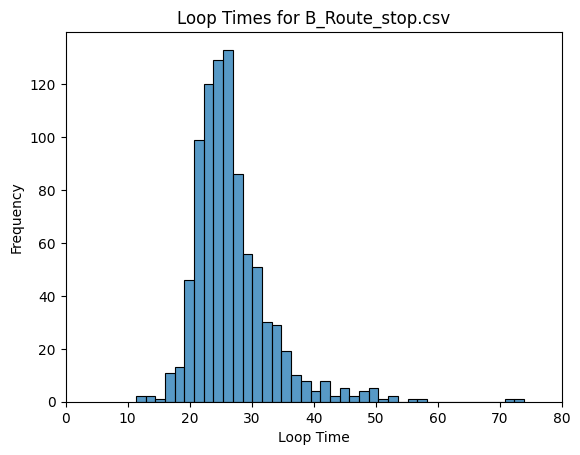

In [23]:
# create a histogram of the loop times
import seaborn as sns, matplotlib.pyplot as plt
sns.histplot(loop_times, bins=40)
plt.title(f'Loop Times for {route}')
plt.xlabel('Loop Time')
plt.ylabel('Frequency')
plt.xlim(0, 80)
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

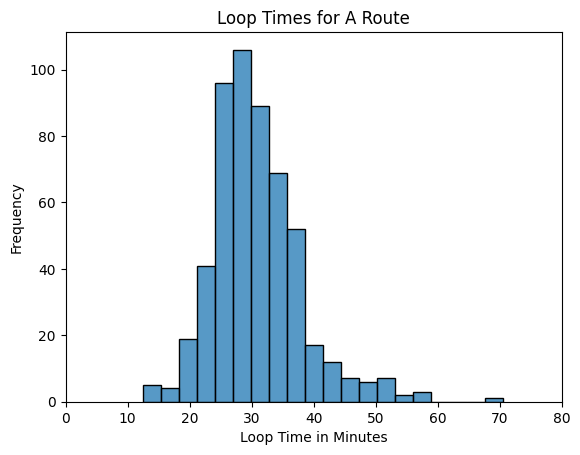

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

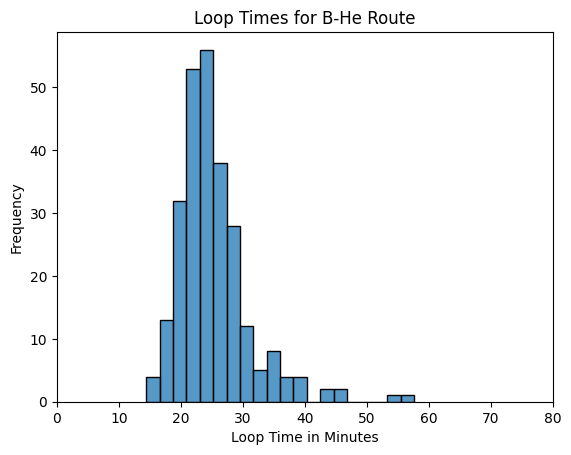

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

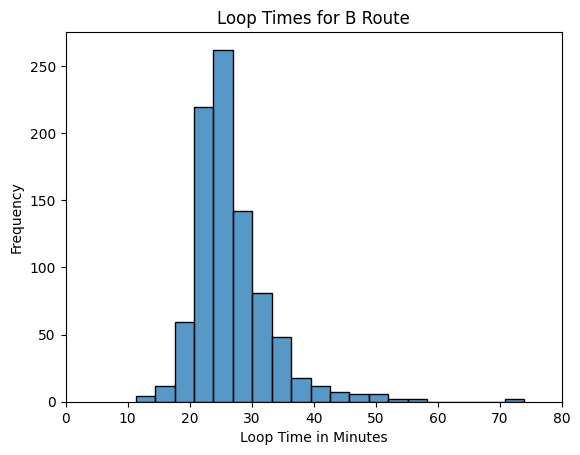

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

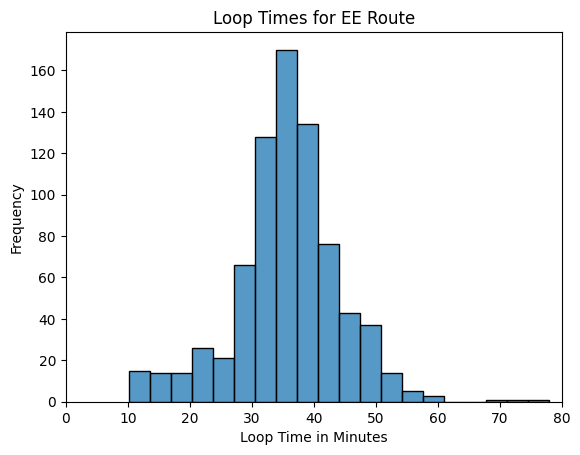

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

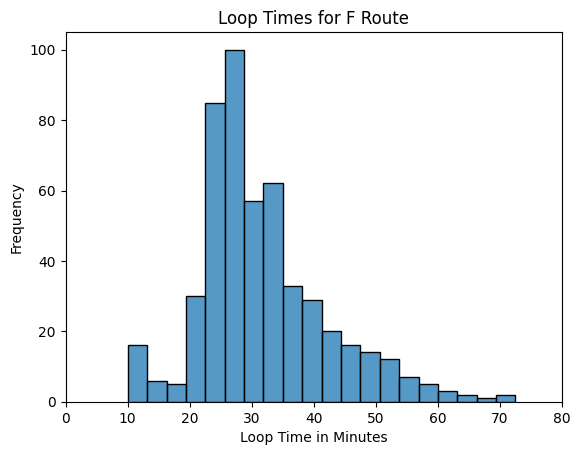

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

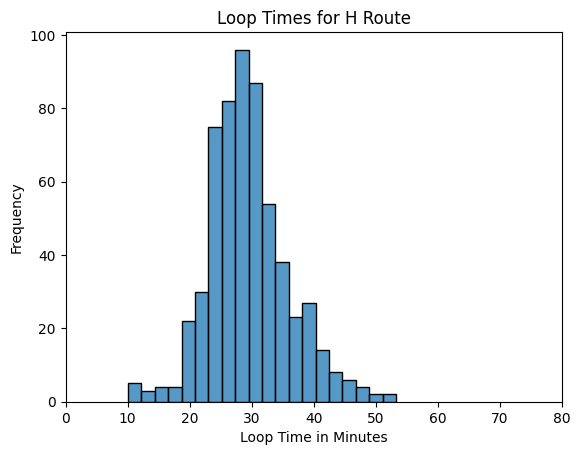

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

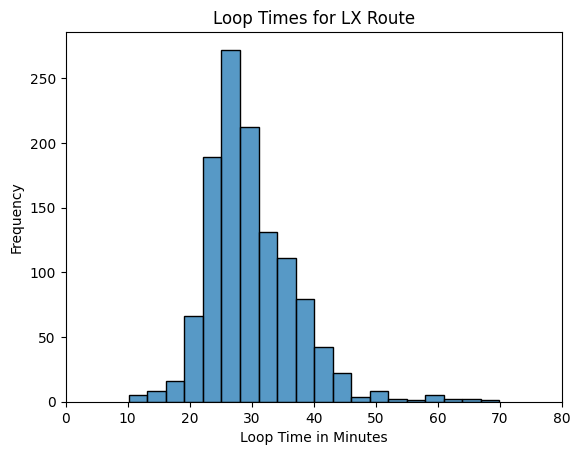

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

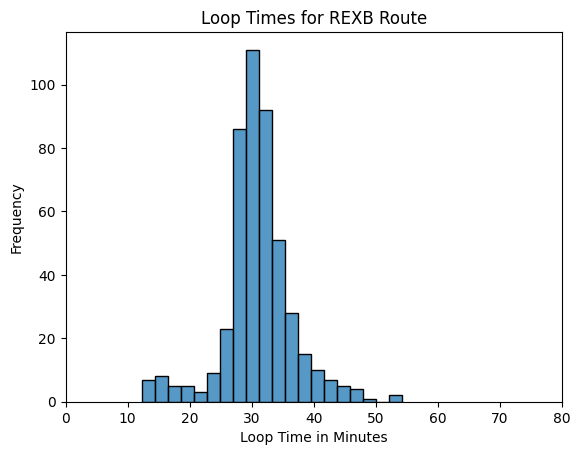

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\1048043707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

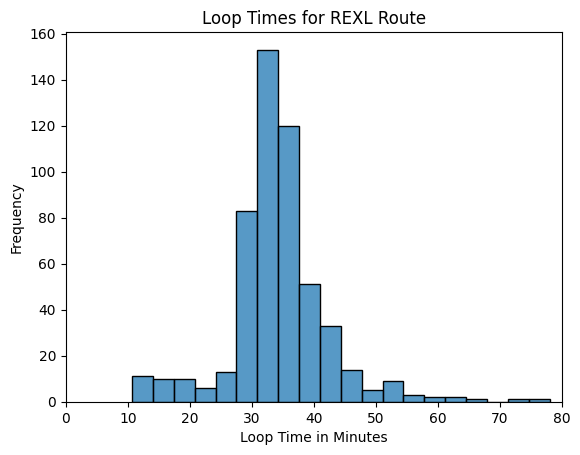

In [17]:
import seaborn as sns, matplotlib.pyplot as plt

for route in list(dfs.keys()):
    # for each bus count the number of times the measurement jumps from 0 to something not equal to 0
    # make a dictionary for each bus and a list with all the times

    if 'C' in route or 'Weekend' in route: continue

    times = {}

    for bus_id in dfs[route]['bus_id'].unique():
        data_bus = dfs[route][dfs[route]['bus_id'] == bus_id]

        data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
        data_bus = data_bus.sort_values(by='timestamp')

        times[bus_id] = []

        for i in range(1, len(data_bus)):
            value = data_bus.iloc[i]['time_on_route']
            before = data_bus.iloc[i-1]['time_on_route']

            if before == 0 and value >= 600:
                times[bus_id].append(value / 60)

    loop_times = []

    for key, value in times.items():
        loop_times.extend(value)
    
    # only include loop times that are less than 80 minutes
    loop_times = [time for time in loop_times if time < 80]
    
    sns.histplot(loop_times, bins=20)
    plt.title(f'Loop Times for {route.replace("_stop.csv", "").replace("_", " ")}')
    plt.xlabel('Loop Time in Minutes')
    plt.ylabel('Frequency')
    plt.xlim(0, 80)
    plt.show()

In [24]:
# for each bus calculate the average loop time
averages = {}
sum_ = 0
length = 0

for key in times:
    if len(times[key]) == 0: continue
    averages[key] = sum(times[key]) / len(times[key])
    sum_ += sum(times[key])
    length += len(times[key])

averages

{4873: 28.822222222222234,
 4876: 25.058675799086764,
 4874: 25.727192982456145,
 4896: 29.85208333333333,
 9419: 27.424999999999997,
 13214: 29.156410256410258,
 18021: 28.836458333333336,
 4882: 26.667006802721094,
 4839: 24.780555555555562,
 4885: 25.101388888888895,
 4859: 25.46010101010102,
 15187: 26.792248062015496,
 4863: 27.616666666666664,
 4891: 24.87291666666667,
 4886: 28.04938271604939,
 17625: 27.988372093023255,
 4864: 27.67600000000001,
 13210: 27.482962962962965,
 11197: 26.37714285714286,
 15188: 24.826190476190476,
 15189: 27.33148148148149,
 4872: 24.497619047619043,
 17627: 20.5,
 9418: 27.21826923076924,
 4853: 26.5859649122807,
 4881: 31.366666666666667,
 4843: 21.84166666666667,
 4890: 27.319999999999997,
 4870: 28.90833333333333,
 18018: 23.104166666666664,
 17626: 20.583333333333332,
 13217: 25.40740740740741,
 4878: 23.977777777777774,
 7149: 29.125000000000004,
 18015: 32.333333333333336}

In [25]:
sum_ / length

26.806821617535906

In [26]:
# for each bus count the number of times the measurement jumps from 0 to something not equal to 0
# make a dictionary for each bus and a list with all the times

times = {}

for bus_id in dfs[route]['bus_id'].unique():
    data_bus = dfs[route][dfs[route]['bus_id'] == bus_id]

    data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
    data_bus = data_bus.sort_values(by='timestamp')

    times[bus_id] = []

    for i in range(1, len(data_bus)):
        value = data_bus.iloc[i]['time_waiting']
        before = data_bus.iloc[i-1]['time_waiting']
        timestamp = data_bus.iloc[i]['timestamp']

        if before == 0 and value > 0:
            times[bus_id].append([timestamp, value / 60])

# get the times from all the buses
wait_times = []

for key, value in times.items():
    wait_times.extend(value)
wait_times

C:\Users\akash\AppData\Local\Temp\ipykernel_8244\2851424935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\2851424935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_8244\2851424935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

[[Timestamp('2024-10-31 14:29:05'), 1.5333333333333334],
 [Timestamp('2024-10-31 14:31:07'), 4.6],
 [Timestamp('2024-10-31 14:37:14'), 0.5166666666666667],
 [Timestamp('2024-10-31 14:43:51'), 1.0166666666666666],
 [Timestamp('2024-10-31 14:45:53'), 1.0166666666666666],
 [Timestamp('2024-10-31 14:48:56'), 2.05],
 [Timestamp('2024-10-31 14:55:03'), 1.5333333333333334],
 [Timestamp('2024-10-31 14:57:36'), 1.5333333333333334],
 [Timestamp('2024-10-31 15:01:10'), 0.5],
 [Timestamp('2024-10-31 15:09:20'), 1.0166666666666666],
 [Timestamp('2024-10-31 15:11:22'), 1.5166666666666666],
 [Timestamp('2024-10-31 15:15:57'), 1.5166666666666666],
 [Timestamp('2024-10-31 15:22:34'), 2.05],
 [Timestamp('2024-10-31 15:25:07'), 2.05],
 [Timestamp('2024-10-31 15:29:12'), 1.0166666666666666],
 [Timestamp('2024-10-31 15:38:53'), 1.5333333333333334],
 [Timestamp('2024-10-31 15:41:27'), 2.033333333333333],
 [Timestamp('2024-10-31 15:46:02'), 2.033333333333333],
 [Timestamp('2024-10-31 15:53:41'), 3.5666666666

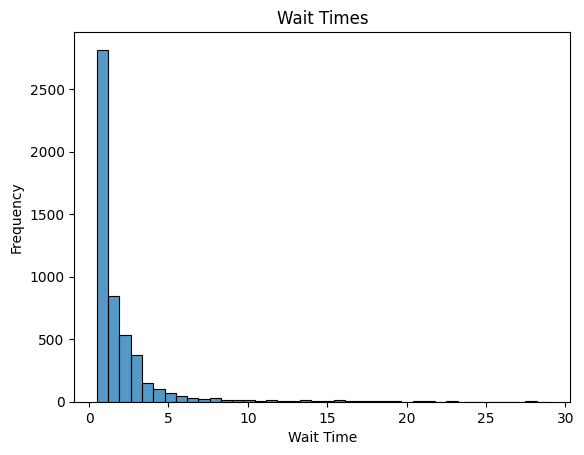

In [27]:
# create a histogram of the loop times
import seaborn as sns, matplotlib.pyplot as plt
sns.histplot([x[1] for x in wait_times], bins=40)
plt.title('Wait Times')
plt.xlabel('Wait Time')
plt.ylabel('Frequency')
plt.show()

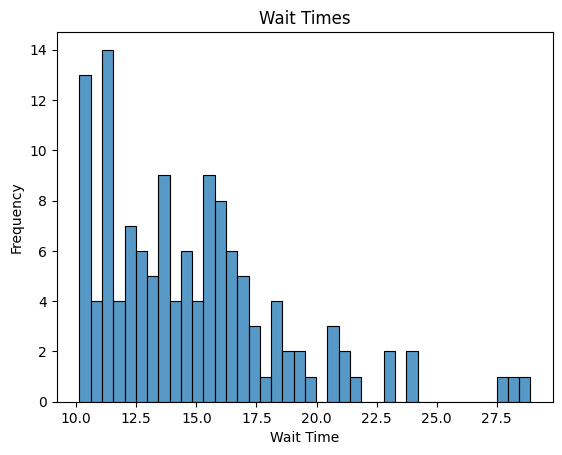

In [28]:
# only graph the data above 2.5 minutes
wait_times_lim = [x[1] for x in wait_times if x[1] > 10]
sns.histplot(wait_times_lim, bins=40)
plt.title('Wait Times')
plt.xlabel('Wait Time')
plt.ylabel('Frequency')
plt.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming wait_times is a list of tuples (timestamp, wait time)
times = [x[0].hour + x[0].minute / 60 + x[0].second / 3600 for x in wait_times]
wait_times_arr = [x[1] for x in wait_times]


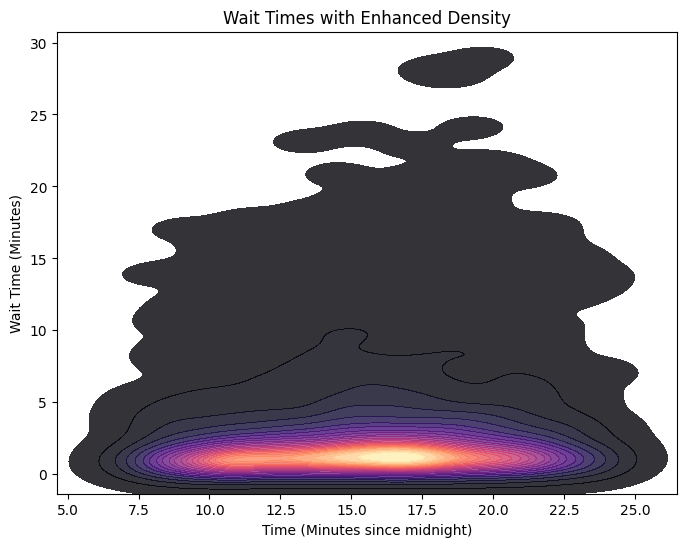

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create density scatter plot with brighter colormap and contours
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=times, y=wait_times_arr, 
    cmap="magma",  # Brighter colormap
    fill=True, 
    alpha=0.8,       # Increase transparency
    levels=25,       # Add fewer levels for contrast
    thresh=0.001      # Control minimum threshold for visualization
)

plt.title('Wait Times with Enhanced Density')
plt.xlabel('Time (Minutes since midnight)')
plt.ylabel('Wait Time (Minutes)')
plt.show()


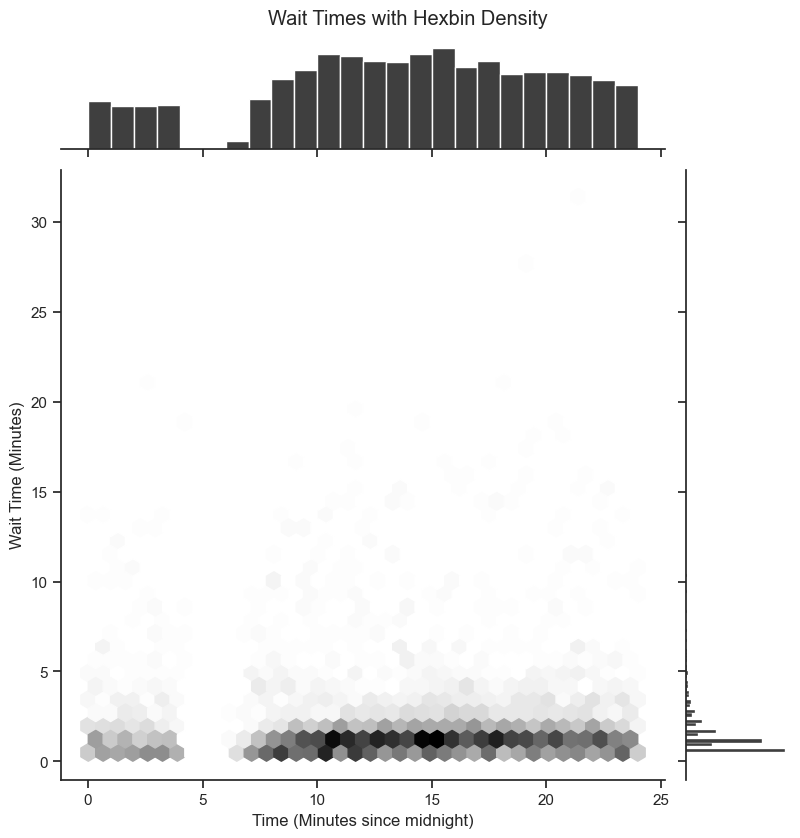

In [619]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming times and wait_times_arr are already calculated
sns.set_theme(style="ticks")

# Create the hexbin joint plot
joint_plot = sns.jointplot(
    x=times,
    y=wait_times_arr,
    kind="hex",
    color="black",  # Choose a color for the hexagons
    height=8,  # Size of the plot,
    palette="crest"  # Choose a color palette for the hexagons
)

# Access the underlying matplotlib figure
fig = joint_plot.fig
fig.patch.set_alpha(0)  # Set the figure's background to transparent

# Make the axes background transparent
for ax in joint_plot.fig.axes:
    ax.patch.set_alpha(0)

# Adjust labels and title
plt.xlabel('Time (Minutes since midnight)')
plt.ylabel('Wait Time (Minutes)')
plt.suptitle("Wait Times with Hexbin Density", y=1.02)  # Adjust the title position

plt.show()



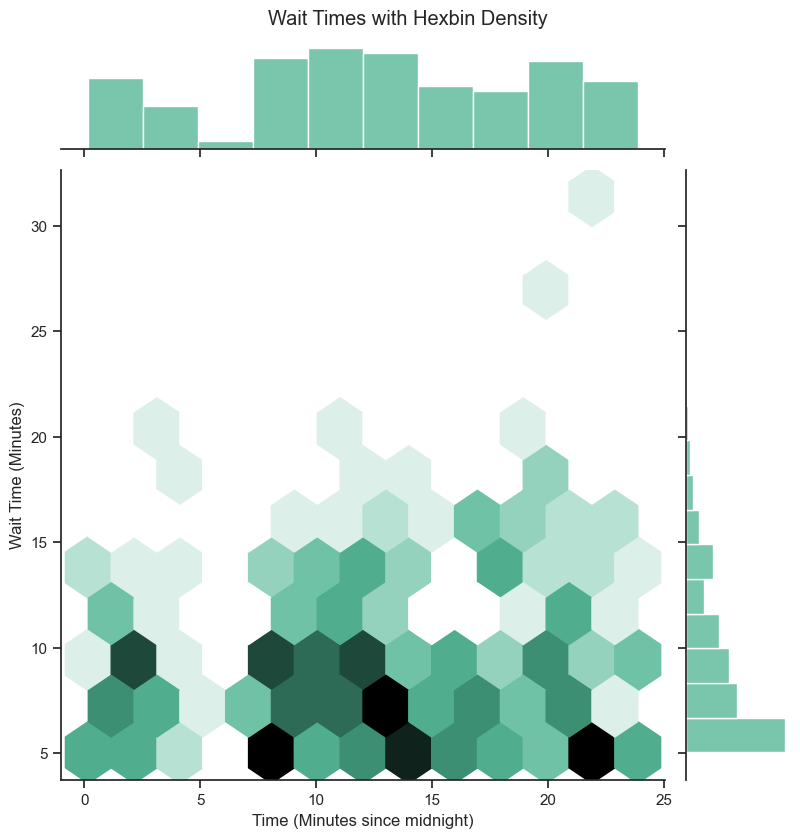

In [620]:
# only plot wait times above 5 minutes
times_lim = []
wait_times_arr_lim = []

for i in range(len(wait_times)):
    if wait_times[i][1] > 5:
        times_lim.append(times[i])
        wait_times_arr_lim.append(wait_times[i][1])

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming times and wait_times_arr are already calculated
sns.set_theme(style="ticks")

# Create the hexbin joint plot
sns.jointplot(
    x=times_lim,
    y=wait_times_arr_lim,
    kind="hex",
    color="#4CB391",  # Choose a color for the hexagons
    height=8  # Size of the plot,
)

plt.xlabel('Time (Minutes since midnight)')
plt.ylabel('Wait Time (Minutes)')
plt.suptitle("Wait Times with Hexbin Density", y=1.02)  # Adjust the title position
plt.show()


In [32]:
# print average bus stop time
sum_ = 0
length = 0

for key in wait_times_arr:
    sum_ += key
    length += 1

average = round(sum_ / length, 2)
average

2.05

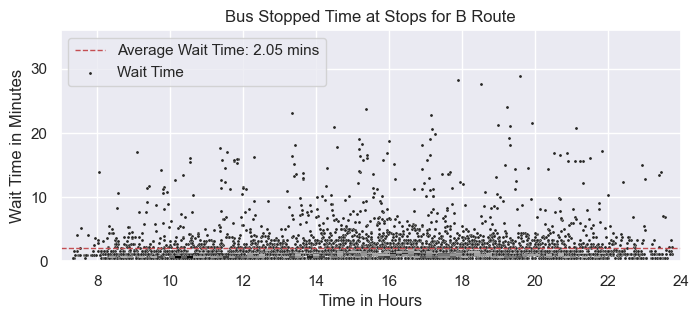

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `times` and `wait_times_arr` are already calculated
sns.set_theme(style="dark")

# Create the figure and axis
f, ax = plt.subplots(figsize=(8, 3))

# add average to chart
plt.axhline(average, color='r', linestyle='dashed', linewidth=1)

# Draw the scatterplot
sns.scatterplot(
    x=times,
    y=wait_times_arr,
    s=5,                # Small size for scatter points
    color=".15",        # Dark gray color for points
    ax=ax
)

# Draw the histogram (2D histogram with colormap)
sns.histplot(
    x=times,
    y=wait_times_arr,
    bins=100,            # Number of bins for the 2D histogram
    pthresh=0.6,        # Threshold for transparency
    cmap="Greys",        # Colormap for the 2D histogram
    ax=ax
)

# Set labels and title
ax.set_xlabel('Time in Hours')
ax.set_ylabel('Wait Time in Minutes')
ax.set_title(f"Bus Stopped Time at Stops for {route.split('_')[0]} Route")

# Set major ticks for x and y axes
ax.set_xticks(range(0, 25, 2))  # Every 60 minutes on x-axis
ax.set_yticks(range(0, int(max(wait_times_arr)) + 10, 10))  # Every 10 minutes on y-axis

# Enable gridlines for better visualization
ax.grid(True)

# Set the limits for the plot
plt.xlim(7, 24)
plt.ylim(0, 36)


# add legend 
plt.legend([f'Average Wait Time: {average} mins', 'Wait Time'], loc='upper left')

# make the resol

plt.savefig(f'graphs/{route.split(".")[0]}_stopped.png', dpi=100)
plt.show()